# <center>Instacart Market Basket Analysis</center>

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Data

In [2]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

# 1. Getting Basic Information about the data

## 1.1. aisles

### 1.1.1. Top 5 rows

In [3]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


### 1.1.2. Dataframe shape

In [32]:
print("Rows = {0}, Columns = {1}".format(aisles.shape[0],aisles.shape[1]))

Rows = 134, Columns = 2


### 1.1.3. Descriptive analysis

In [5]:
aisles.describe()

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


### 1.1.4. Basic info

In [6]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


### 1.1.5. Unique Aisles

In [7]:
# https://www.geeksforgeeks.org/python-pandas-series-nunique/
print("Total Number of aisles = ", aisles['aisle_id'].nunique())

Total Number of aisles =  134


### 1.1.6. Missing Values

In [50]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

## 1.2. Departments

### 1.2.1. Top 5 rows

In [8]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


### 1.2.2. Dataframe shape

In [31]:
print("Rows = {0}, Columns = {1}".format(departments.shape[0],departments.shape[1]))

Rows = 21, Columns = 2


### 1.2.3. Descriptive Analysis

In [10]:
departments.describe()

,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


### 1.2.4. Basic Info

In [11]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


### 1.2.5. Unique Departments

In [12]:
# https://www.geeksforgeeks.org/python-pandas-series-nunique/
print("Total Number of departments = ", departments['department_id'].nunique())

Total Number of departments =  21


### 1.2.6. Missing Values

In [51]:
departments.isnull().sum()

department_id    0
department       0
dtype: int64

## 1.3. Order Products Prior

### 1.3.1. Top 5 rows

In [13]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


### 1.3.2. Dataframe shape

In [30]:
print("Rows = {0}, Columns = {1}".format(order_products_prior.shape[0],order_products_prior.shape[1]))

Rows = 32434489, Columns = 4


### 1.3.3. Analysis of add_to_cart_order variable

In [16]:
order_products_prior['add_to_cart_order'].describe()

count    3.243449e+07
mean     8.351076e+00
std      7.126671e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      1.450000e+02
Name: add_to_cart_order, dtype: float64

<h3 style = "color:red">Observation: Maximum 145 products had been added to the cart by the coustomer.</h3>

### 1.3.4. Basic info

In [17]:
order_products_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


### 1.3.5. reordered products count

In [18]:
order_products_prior['reordered'].value_counts()

1    19126536
0    13307953
Name: reordered, dtype: int64

### 1.3.6. reordered products percentage

In [20]:
order_products_prior['reordered'].value_counts(normalize=True)

1    0.589697
0    0.410303
Name: reordered, dtype: float64

   <h3 style="color:red">Observation: Almost 59% of the products have been reordered.</h3>

### 1.3.7. Missing Values

In [52]:
order_products_prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

## 1.4. Order Products Train

### 1.4.1. Top 5 rows

In [19]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


### 1.4.2. Dataframe shape

In [29]:
print("Rows = {0}, Columns = {1}".format(order_products_train.shape[0],order_products_train.shape[1]))

Rows = 1384617, Columns = 4


### 1.4.3. Add to cart order variable analysis

In [21]:
order_products_train['add_to_cart_order'].describe()

count    1.384617e+06
mean     8.758044e+00
std      7.423936e+00
min      1.000000e+00
25%      3.000000e+00
50%      7.000000e+00
75%      1.200000e+01
max      8.000000e+01
Name: add_to_cart_order, dtype: float64

<h3 style="color:red">Observation: Maximum 80 products had been added to the cart by any customer.</h3>

### 1.4.4. Basic Info

In [22]:
order_products_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


### 1.4.5. Reordered products count

In [23]:
order_products_train['reordered'].value_counts()

1    828824
0    555793
Name: reordered, dtype: int64

### 1.4.6. Reordered products percentage

In [23]:
order_products_train['reordered'].value_counts(normalize=True)

1    0.598594
0    0.401406
Name: reordered, dtype: float64

   <h3 style="color:red"> Observation: Almost 60% of the products had been reordered.</h3>

### 1.4.7. Missing Values

In [53]:
order_products_train.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

## 1.5. Orders

### 1.5.1. Top 5 rows

In [24]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


### 1.5.2. Dataframe shape

In [28]:
print("Rows = {0}, Columns = {1}".format(orders.shape[0],orders.shape[1]))

Rows = 3421083, Columns = 7


### 1.5.3. Descriptive Analysis

In [25]:
orders[['order_number','order_dow','order_hour_of_day','days_since_prior_order']].describe()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


### 1.5.4. Basic Info

In [27]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


### 1.5.5. Unique Orders

In [28]:
## https://www.geeksforgeeks.org/python-pandas-series-nunique/

print("Total Number of orders = ", orders['order_id'].nunique())

Total Number of orders =  3421083


### 1.5.6. Unique Users

In [29]:
## https://www.geeksforgeeks.org/python-pandas-series-nunique/

print("Total Number of users = ", orders['user_id'].nunique())

Total Number of users =  206209


### 1.5.7. Missing Values

In [54]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

<h3 style="color:red">There are 206209 missing values of the variable days_since_prior_order</h3>

## 1.6. Products

### 1.6.1. Top 5 rows

In [30]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


### 1.6.2. Dataframe shape

In [38]:
print("Rows = {0}, Columns = {1}".format(products.shape[0],products.shape[1]))

Rows = 49688, Columns = 4


### 1.6.3. Basic Info

In [39]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### 1.6.4. Unique Products

In [40]:
## https://www.geeksforgeeks.org/python-pandas-series-nunique/

print("Total Number of products = ", products['product_id'].nunique())

Total Number of products =  49688


### 1.6.5. Missing Values

In [55]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

## 1.7. Summary

### 1.7.1. Unique Count

In [45]:
#https://stackoverflow.com/a/26937531/12991246

from texttable import Texttable

count = Texttable()
count.add_rows([['Table', 'Unique Count'], 
                ['Aisle', 134], 
                ['Department', 21],
                ['Orders', 3421083],
                ['Users', 206209],
                ['Products',49688]])
print(count.draw())

+------------+--------------+
|   Table    | Unique Count |
+============+==============+
| Aisle      | 134          |
+------------+--------------+
| Department | 21           |
+------------+--------------+
| Orders     | 3421083      |
+------------+--------------+
| Users      | 206209       |
+------------+--------------+
| Products   | 49688        |
+------------+--------------+


### 1.7.2. Reorder Percentage

In [46]:
reorder = Texttable()

reorder.add_rows([['Table','Percentage','Add to cart order(max)'],
                  ['order_product_prior',59,145],
                  ['order_product_train',60,80]])
print(reorder.draw())

+---------------------+------------+------------------------+
|        Table        | Percentage | Add to cart order(max) |
+=====================+============+========================+
| order_product_prior | 59         | 145                    |
+---------------------+------------+------------------------+
| order_product_train | 60         | 80                     |
+---------------------+------------+------------------------+


### 1.7.3. Shape

In [57]:
shape = Texttable()

shape.add_rows([['Table','Rows','Columns','Null Value','Column'],
                ['Aisle',134, 2, 0, 'NA'],
                ['Department',21, 2, 0, 'NA'],
                ['order_product_prior', 32434489, 4, 0, 'NA'],
                ['order_product_train', 1384617, 4, 0, 'NA'],
                ['orders',3421083,7,206209,'days_since_prior_order'],
                ['products', 49688, 4, 0,'NA']])

print(shape.draw())

+---------------------+----------+---------+------------+----------------------+
|        Table        |   Rows   | Columns | Null Value |        Column        |
+=====================+==========+=========+============+======================+
| Aisle               | 134      | 2       | 0          | NA                   |
+---------------------+----------+---------+------------+----------------------+
| Department          | 21       | 2       | 0          | NA                   |
+---------------------+----------+---------+------------+----------------------+
| order_product_prior | 32434489 | 4       | 0          | NA                   |
+---------------------+----------+---------+------------+----------------------+
| order_product_train | 1384617  | 4       | 0          | NA                   |
+---------------------+----------+---------+------------+----------------------+
| orders              | 3421083  | 7       | 206209     | days_since_prior_ord |
|                     |     

# 2. Univariate Analysis

## 2.1. Order Products Prior

### 2.1.1 Countplot: Add to Cart Order

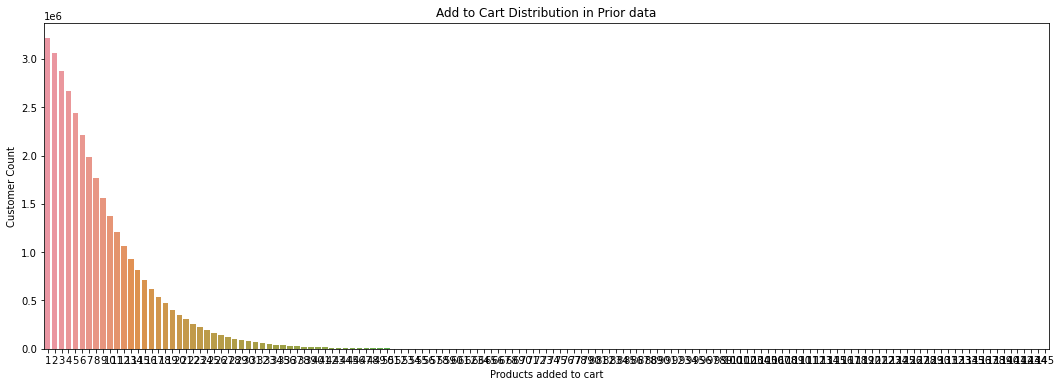

In [58]:
plt.figure(figsize=(18,6))
fig = sns.countplot(x='add_to_cart_order', data=order_products_prior)

plt.xlabel('Products added to cart')
plt.ylabel('Customer Count')
plt.title('Add to Cart Distribution in Prior data')
plt.show()

In [74]:
prior_add_to_cart_count = order_products_prior['add_to_cart_order'].value_counts(ascending=True)

In [96]:
prior_add_to_cart_count.head()

,add_to_cart_order
145,1
138,1
139,1
140,1
144,1


Maximum Product added to cart by any customer is 145

### 2.1.2. Bar plot: Reordered vs Not Reordered

In [137]:
# How to add percentages on top of bars in seaborn?: https://stackoverflow.com/a/62053049/12991246
def without_hue(plot, feature):
    
    """
    prints percentage on the top of the bar plot
    """
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

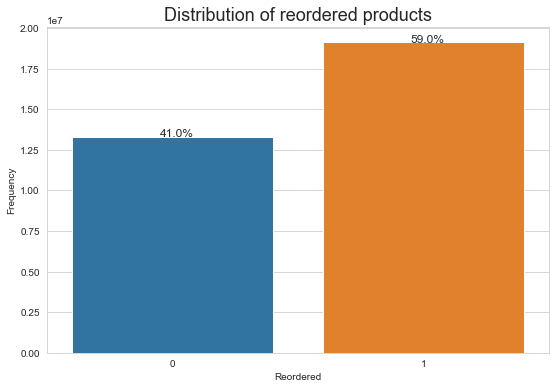

In [173]:
plt.figure(figsize=(9,6))
ax = sns.countplot(x='reordered',data=order_products_prior)
plt.title('Distribution of reordered products',size=18)
plt.xlabel('Reordered')
plt.ylabel('Frequency')
without_hue(ax, order_products_prior.reordered) #function call to add percentage on the top of bar plot
plt.show()

Almost 59% of the products had been reordered. 

## 2.2. Order Product Train

### 2.2.1. Countplot : Add to Cart Order

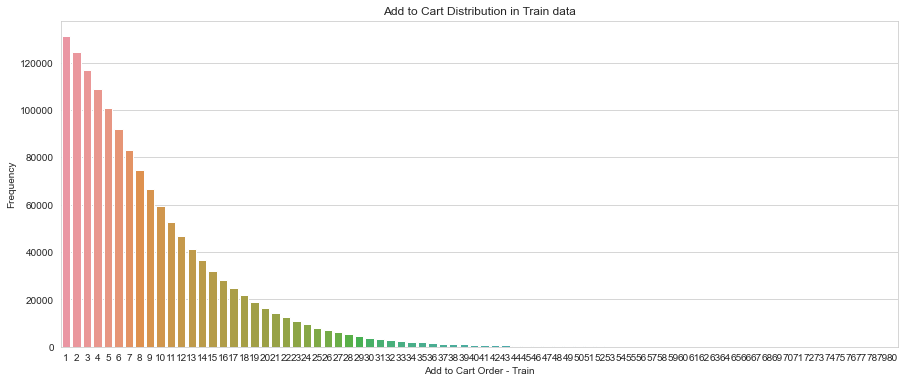

In [161]:
plt.figure(figsize=(15,6))
sns.countplot(x='add_to_cart_order', data=order_products_train)
plt.xlabel('Add to Cart Order - Train')
plt.ylabel('Frequency')
plt.title('Add to Cart Distribution in Train data')
plt.show()

In [69]:
train_add_to_cart_count = order_products_train['add_to_cart_order'].value_counts(ascending=True)

In [95]:
train_add_to_cart_count.head()

,add_to_cart_order
80,2
79,2
78,2
77,3
76,5


Maxuimum Product added to cart by any customer is 80.

### 2.2.2. Bar Plot: Reordered vs Not Reordered

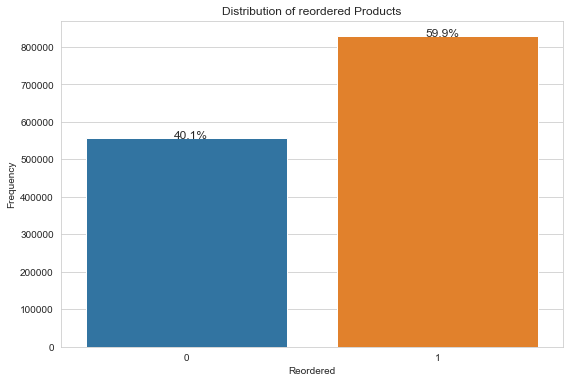

In [174]:
plt.figure(figsize=(9,6))
ax = sns.countplot(x='reordered',data=order_products_train)
plt.title("Distribution of reordered Products")
plt.xlabel("Reordered")
plt.ylabel("Frequency")
without_hue(ax, order_products_train.reordered)
plt.show()

Almost 60% of the products have been reordered.

## 2.3. Orders

### 2.3.1. Which day of the week is the most important for ordering?

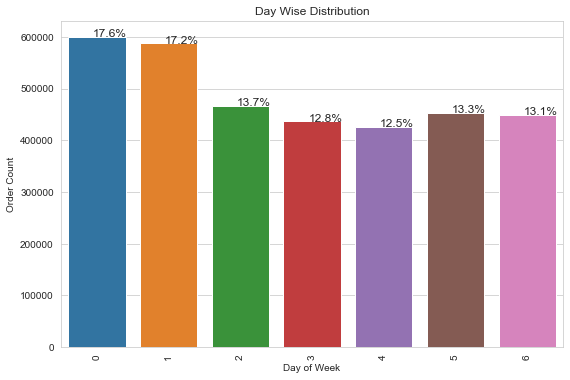

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,6))
ax = sns.countplot(x='order_dow',data=orders)

plt.xticks(rotation='vertical')
plt.title("Day Wise Distribution")
plt.ylabel('Order Count')
plt.xlabel('Day of Week')
without_hue(ax, orders.order_dow)
plt.show()

In [94]:
orders_dow = orders['order_dow'].value_counts(normalize=True).reset_index()
orders_dow.columns = ['Day', 'Order Percentage']
orders_dow['Order Percentage'] = orders_dow['Order Percentage']*100
orders_dow

,Day,Order Percentage
0,0,17.564759
1,1,17.172281
2,2,13.658248
3,5,13.252178
4,6,13.117513
5,3,12.772914
6,4,12.462106


* Most of the orders are done on weekends(assuming 0 as saturday and 1 as sunday)
* Least orders has been done on wednesday.

### 2.3.2 Which hour of the day is most important for ordering?

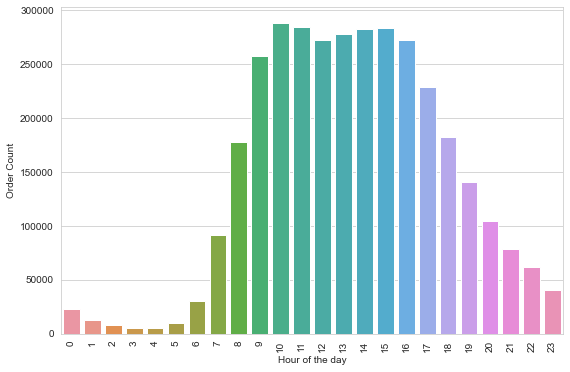

In [167]:
plt.figure(figsize=(9,6))
sns.countplot(x='order_hour_of_day',data=orders)

plt.xticks(rotation='vertical')
plt.ylabel('Order Count')
plt.xlabel('Hour of the day')
plt.show()

In [93]:
order_hour = orders['order_hour_of_day'].value_counts(normalize=True, ascending=False).reset_index()
order_hour.columns = ['Hour','Order Percentage']
order_hour['Order Percentage'] = order_hour['Order Percentage']*100
order_hour

,Hour,Order Percentage
0,10,8.430605
1,11,8.322745
2,15,8.290913
3,14,8.273462
4,13,8.126052
5,12,7.975282
6,16,7.966863
7,9,7.535976
8,17,6.687794
9,18,5.346611


* Most of the orders is done between 10 am to 6 pm

### 2.3.3. How after many days customer usually reorder products ?

In [88]:
#dropping the rows having NAN values
orders['days_since_prior_order'] = orders['days_since_prior_order'].dropna()

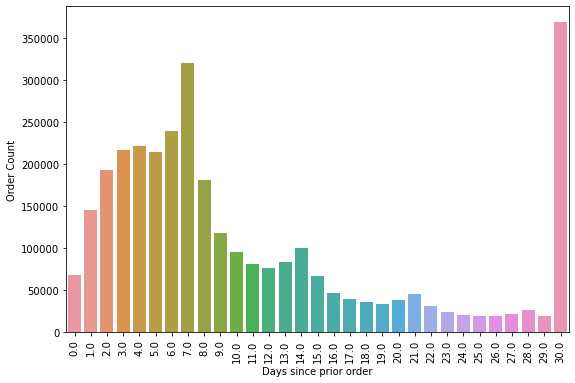

In [89]:
plt.figure(figsize=(9,6))
sns.countplot(x='days_since_prior_order',data=orders)

plt.xticks(rotation='vertical')
plt.ylabel('Order Count')
plt.xlabel('Days since prior order')
plt.show()

In [91]:
order_days_prior = orders['days_since_prior_order'].value_counts(normalize=True).reset_index()
order_days_prior.columns = ['day','Order Percentage']
order_days_prior['Order Percentage'] = order_days_prior['Order Percentage']*100
order_days_prior

,day,Order Percentage
0,30.0,11.487946
1,7.0,9.972646
2,6.0,7.465705
3,4.0,6.895947
4,3.0,6.750031
5,5.0,6.672206
6,2.0,6.009753
7,8.0,5.652383
8,1.0,4.517969
9,9.0,3.676287


* Maximum orders has been observed after 30 days
* Second most number of orders has been done after 7 days

### 4. How many products do customers usually order ?

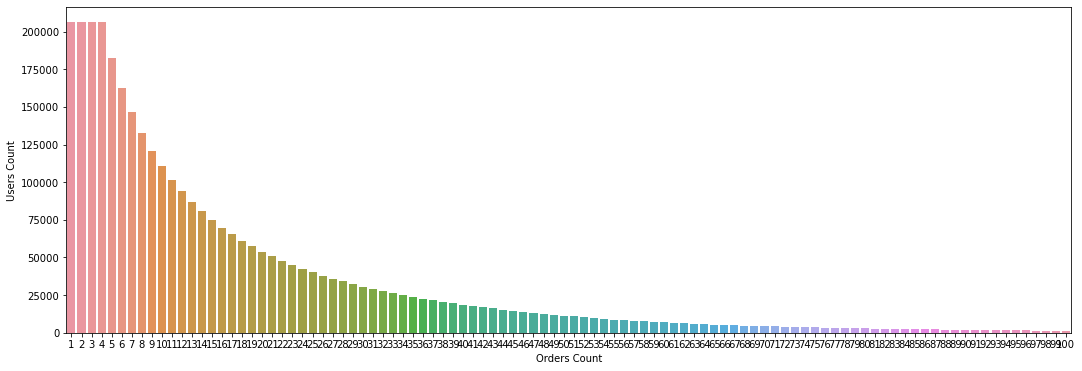

In [107]:
plt.figure(figsize=(18,6))
order_number = orders['order_number'].value_counts().reset_index()
order_number.columns = ['order_count','customers']

sns.barplot(order_number['order_count'], order_number['customers'])
plt.xlabel('Orders Count')
plt.ylabel('Users Count')
plt.show()

In [108]:
order_number.head()

,order_count,customers
0,1,206209
1,2,206209
2,3,206209
3,4,206209
4,5,182223


In [109]:
order_number.tail()

,order_count,customers
95,96,1592
96,97,1525
97,98,1471
98,99,1421
99,100,1374


* Minimum number of items ordered by any customer is 4.
* Maximum number of items ordered by any customer is 100, and it is done by 1374 customers.

### 5. Data distribution across different sets

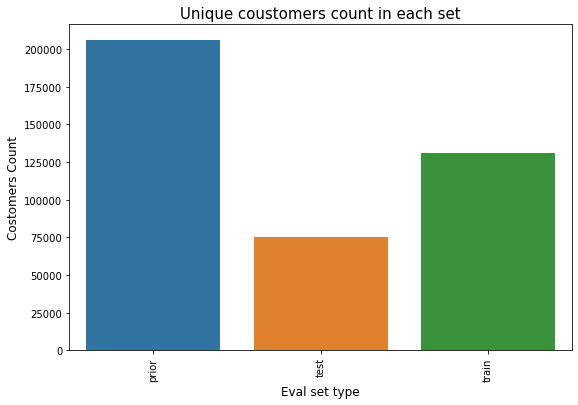

In [118]:
#get count of unique values in column pandas - https://stackoverflow.com/a/38309823/12991246
plt.figure(figsize=(9,6))
set_count = orders.groupby('eval_set')['user_id'].nunique().reset_index()
set_count.columns = ['eval_set','unique_customers']

ax = sns.barplot(set_count['eval_set'], set_count['unique_customers'])
plt.ylabel('Costomers Count', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Unique coustomers count in each set', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [119]:
set_count

,eval_set,unique_customers
0,prior,206209
1,test,75000
2,train,131209


* All customers data are there in the prior set
* Out of 206209 coustomers, 131209 coustomers data has been given in the train set.
* For 75000 coustomers,We need to predict the products.

### 2.2.4. Product Orders

<b> Merging the tables (order_product_prior, products, aisles, departments)</b>

In [101]:
#https://www.geeksforgeeks.org/python-merge-join-and-concatenate-dataframes-using-panda/

order_products_prior = pd.merge(order_products_prior, products, on='product_id', how='left')
order_products_prior = pd.merge(order_products_prior, aisles, on='aisle_id', how='left')
order_products_prior = pd.merge(order_products_prior, departments, on='department_id', how='left')
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [102]:
order_products_prior.shape

(32434489, 9)

### Top 10 Products

In [103]:
products = order_products_prior['product_name'].value_counts().head(10).reset_index()
products = pd.DataFrame(products)
products.columns = ['Products','Count']
products

,Products,Count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


### Bar plot: Top 10 Products

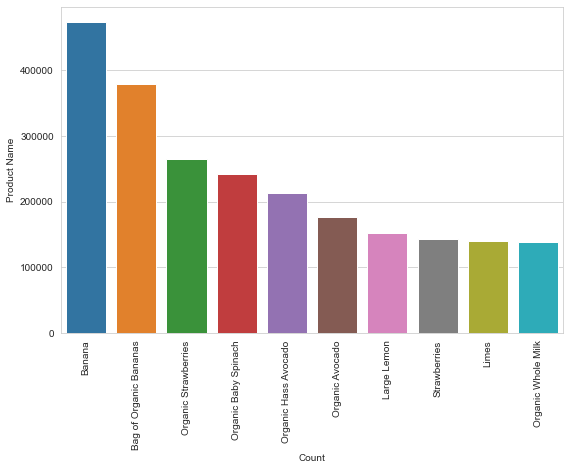

In [172]:
plt.figure(figsize=(9,6))
sns.barplot(products['Products'],products['Count'])

plt.xticks(rotation='vertical')
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.show()

* Banana is the most ordered product by the coustomers.
* Most of the frequently ordered products are organic products.

### Top 10 Aisles

In [105]:
aisles = order_products_prior['aisle'].value_counts().head(10).reset_index()
aisles.columns = ["Aisles","Count"]
aisles = pd.DataFrame(aisles)
aisles

,Aisles,Count
0,fresh fruits,3642188
1,fresh vegetables,3418021
2,packaged vegetables fruits,1765313
3,yogurt,1452343
4,packaged cheese,979763
5,milk,891015
6,water seltzer sparkling water,841533
7,chips pretzels,722470
8,soy lactosefree,638253
9,bread,584834


### Bar Plot: Top 10 Aisles

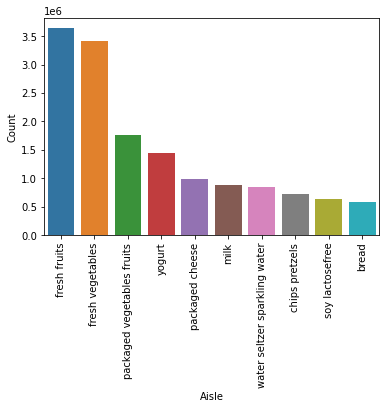

In [106]:
sns.barplot(aisles['Aisles'], aisles['Count'])
plt.ylabel('Count')
plt.xlabel('Aisle')
plt.xticks(rotation='vertical')
plt.show()

* Fresh Fruits and Fresh Vegetables are the top 2 aisles

### Top 10 Departments

In [107]:
dept_count = order_products_prior['department'].value_counts().head(10).reset_index()
dept_count = pd.DataFrame(dept_count)
dept_count.columns = ['Department_Name', 'Count']
dept_count

,Department_Name,Count
0,produce,9479291
1,dairy eggs,5414016
2,snacks,2887550
3,beverages,2690129
4,frozen,2236432
5,pantry,1875577
6,bakery,1176787
7,canned goods,1068058
8,deli,1051249
9,dry goods pasta,866627


### Bar Plot: Top 10 Departments

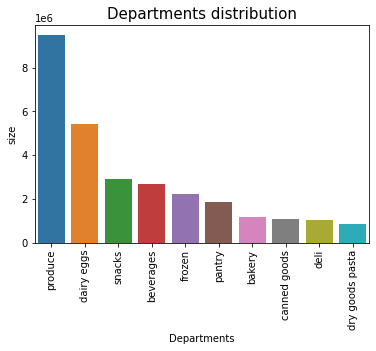

In [108]:
sns.barplot(dept_count['Department_Name'],dept_count['Count'])
plt.xlabel('Departments')
plt.ylabel('size')
plt.title("Departments distribution", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

* Produce is the largest department

### Point Plot: Department wise reorder percentage

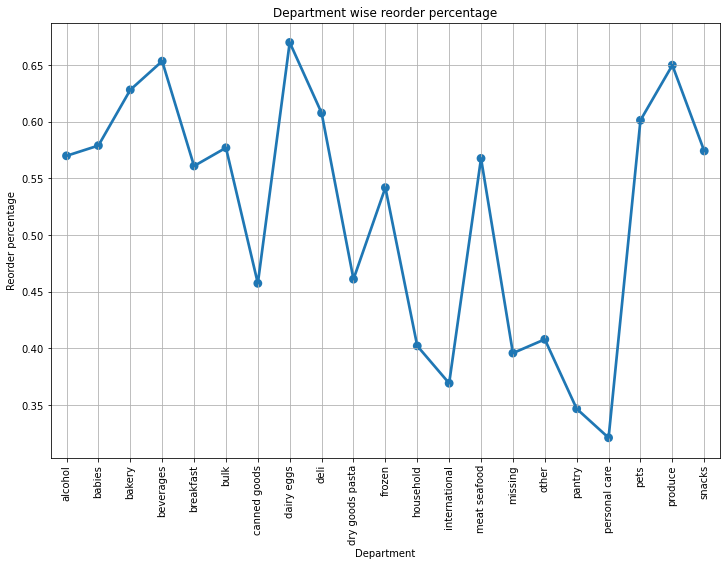

In [109]:
reordered_department = order_products_prior.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))

#https://seaborn.pydata.org/generated/seaborn.pointplot.html
sns.pointplot(reordered_department['department'].values, reordered_department['reordered'].values)
plt.ylabel('Reorder percentage')
plt.xlabel('Department')
plt.title("Department wise reorder percentage")
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

In [110]:
#https://stackoverflow.com/a/40048205/12991246

desc_sorted = reordered_department.sort_values('reordered', ascending=False)
desc_sorted

,department,reordered
7,dairy eggs,0.669969
3,beverages,0.653460
19,produce,0.649913
2,bakery,0.628141
8,deli,0.607719
18,pets,0.601285
1,babies,0.578971
5,bulk,0.577040
20,snacks,0.574180
0,alcohol,0.569924


Dairy eggs is the most reordered product and personal care is the least reordered.

## 3. Bi-variate Analysis

### 3.1. order products prior

## Collinearity Check

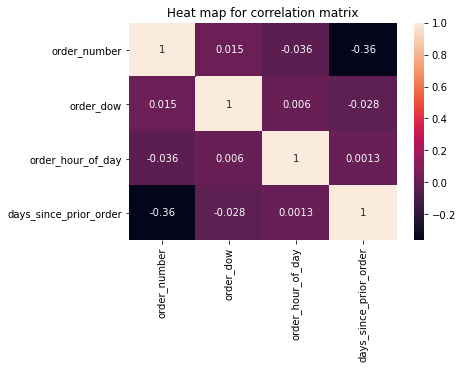

In [112]:
orders_col = orders[['order_number','order_dow','order_hour_of_day','days_since_prior_order']]
var_corr = orders_col.corr()

sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns, annot=True)
plt.title('Heat map for correlation matrix')
plt.show()

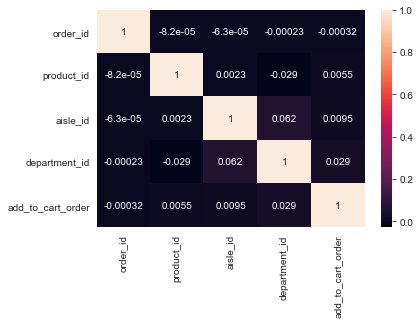

In [116]:
order_products_prior_col = order_products_prior[['order_id', 'product_id','aisle_id','department_id','add_to_cart_order']]

prior_corr = order_products_prior_col.corr()
sns.heatmap(prior_corr, xticklabels=prior_corr.columns, yticklabels=prior_corr.columns, annot=True)
plt.show()